In [1]:
import os
import cv2
import numpy as np
import dv_processing as dv
import matplotlib.pyplot as plt

from datetime import timedelta
from timeit import default_timer as timer

objc[9050]: Class CaptureDelegate is implemented in both /Users/winirrr/pytorch-test/env/lib/libopencv_videoio.4.6.0.dylib (0x10f4b5240) and /Users/winirrr/pytorch-test/env/lib/python3.9/site-packages/dv_processing.dylibs/libopencv_videoio.4.8.0.dylib (0x12e324880). One of the two will be used. Which one is undefined.


In [2]:
def extract_event_data(events):
    data = np.array([[event.timestamp(), event.x(), event.y(), event.polarity()] for event in events])
    return data


In [3]:
file_path = '/Users/winirrr/Documents/EventBased_Project/raw_data/EB_data_1/no_press/dvSave-2024_06_25_15_33_56.aedat4'

capture = dv.io.MonoCameraRecording(file_path)

slicer = dv.EventStreamSlicer()
sliced_events = []

def slicing_callback(events: dv.EventStore):
    extract_events = extract_event_data(events)
    sliced_events.append(extract_events)


slicer.doEveryTimeInterval(timedelta(milliseconds=1), slicing_callback)

while capture.isRunning():
    events = capture.getNextEventBatch()
    if events is not None:
        slicer.accept(events)

In [4]:
len(sliced_events)

2519

In [5]:
# def accumulate_events(events):
#     img_positve = np.zeros((480, 640), dtype=np.uint8)
#     img_negative = np.zeros((480, 640), dtype=np.uint8)

#     for event in events:
#         t, x, y, p = event
#         if p > 0:
#             img_positve[y, x] = 1
#         else:
#             img_negative[y, x] = -1

#     return img_positve, img_negative

# img_positive, img_negative = accumulate_events(sliced_events[100])

In [6]:
# import cv2

# def detect_marker_edges(img_positive, img_negative):
#     # Detect edges using the Canny edge detector
#     edges_positive = cv2.Canny(img_positive, threshold1=50, threshold2=150)
#     edges_negative = cv2.Canny(img_negative, threshold1=50, threshold2=150)
    
#     return edges_positive, edges_negative

# edges_positive, edges_negative = detect_marker_edges(img_positive, img_negative)

In [7]:
# def analyze_edge_movement(edges_positive, edges_negative):
#     # Analyze the movement of edges to determine the location and movement of the marker
#     # This is a placeholder; implement your edge movement analysis logic here
    
#     # Example: Find contours and their centroids
#     contours_positive, _ = cv2.findContours(edges_positive, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     contours_negative, _ = cv2.findContours(edges_negative, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     centroids_positive = [cv2.moments(cnt) for cnt in contours_positive]
#     centroids_negative = [cv2.moments(cnt) for cnt in contours_negative]
    
#     # Calculate the centroids of positive and negative events
#     centroids_pos = [(int(m['m10'] / m['m00']), int(m['m01'] / m['m00'])) for m in centroids_positive if m['m00'] != 0]
#     centroids_neg = [(int(m['m10'] / m['m00']), int(m['m01'] / m['m00'])) for m in centroids_negative if m['m00'] != 0]
    
#     return centroids_pos, centroids_neg

# centroids_pos, centroids_neg = analyze_edge_movement(edges_positive, edges_negative)


In [8]:
# import matplotlib.pyplot as plt

# def visualize_results(img_positive, img_negative, centroids_pos, centroids_neg):
#     plt.figure(figsize=(12, 6))
    
#     plt.subplot(1, 2, 1)
#     plt.imshow(img_positive, cmap='gray')
#     for (x, y) in centroids_pos:
#         plt.plot(x, y, 'ro')
#     plt.title('Positive Events and Centroids')
    
#     plt.subplot(1, 2, 2)
#     plt.imshow(img_negative, cmap='gray')
#     for (x, y) in centroids_neg:
#         plt.plot(x, y, 'bo')
#     plt.title('Negative Events and Centroids')
    
#     plt.show()

# visualize_results(img_positive, img_negative, centroids_pos, centroids_neg)


In [9]:
# print(centroids_neg)

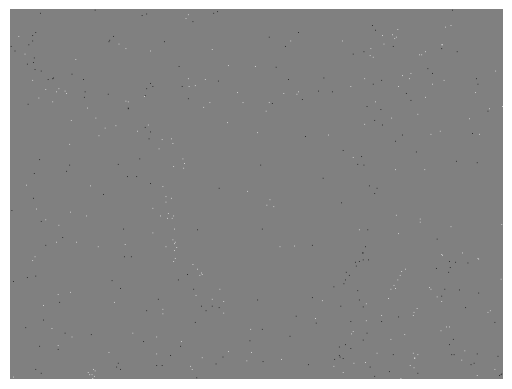

In [21]:
def accumulate_events(events):
    img = np.zeros((480, 640), dtype=np.int8)  # Use int8 to represent both positive and negative values

    for event in events:
        t, x, y, p = event
        if p > 0:
            img[y, x] = 1
        else:
            img[y, x] = -1

    return img


img = accumulate_events(sliced_events[6])

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
# Step 2: Convert image to 8-bit format
img_8bit = (img + 1) * 127  # Convert from [-1, 1] to [0, 254]
img_8bit = img_8bit.astype(np.uint8)

# # Step 3: Threshold the image to create a binary mask
# _, binary_img = cv2.threshold(img_8bit, 127, 255, cv2.THRESH_BINARY)

# Step 3: Apply Canny edge detection
edges = cv2.Canny(img_8bit, 100, 200)

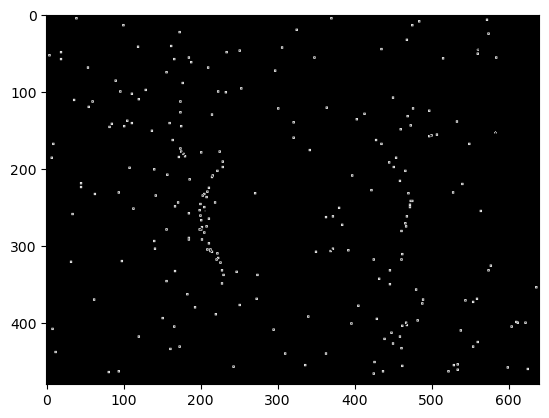

In [12]:
plt.imshow(edges, cmap="gray")

In [13]:
# Step 4: Find contours in the binary image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
# Step 5: Calculate the centroid of each contour
centroids = []
for cnt in contours:
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])
        centroids.append((cX, cY))

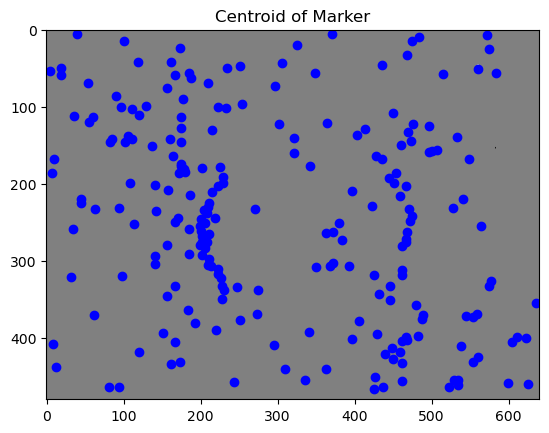

In [15]:
# Display the result
plt.imshow(img, cmap="gray")
for (x,y) in centroids:
    plt.plot(x,y, 'bo')
plt.title('Centroid of Marker')
plt.show()


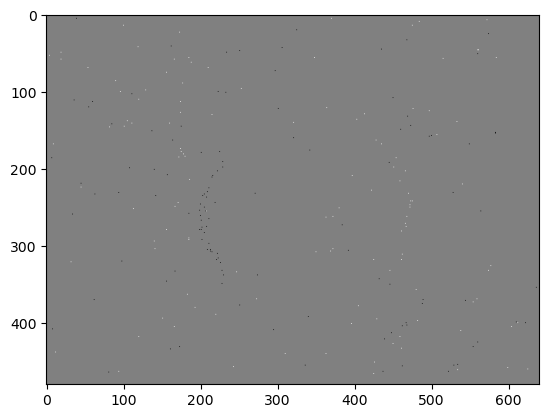

In [16]:
plt.imshow(img_8bit, cmap="gray")

In [22]:
for se in sliced_events:
    print(se)
    break

[[1719297236441248              467              292                0]
 [1719297236441250              463               20                0]
 [1719297236441250              461               84                1]
 ...
 [1719297236442238              504              266                1]
 [1719297236442241              494              207                0]
 [1719297236442247              473              144                0]]
